# Explore here

In [1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")
print(df.head()) 

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [2]:
df.shape

(41188, 21)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# control de duplicados
df.duplicated().sum()

np.int64(12)

In [5]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
#df.drop([], axis = 1, inplace = True)
#En este caso no veo columnas susceptibles a ser borradas, creo que todas son interesantes
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [9]:
df.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [10]:
df.marital.value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [11]:
df.education.value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [12]:
df.default.value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [13]:
df.housing.value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [14]:
df.loan.value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [15]:
df.contact.value_counts()

contact
cellular     26135
telephone    15041
Name: count, dtype: int64

In [16]:
df.month.value_counts()

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [17]:
df.day_of_week.value_counts()

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64

In [18]:
df.poutcome.value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [19]:
df.y.value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

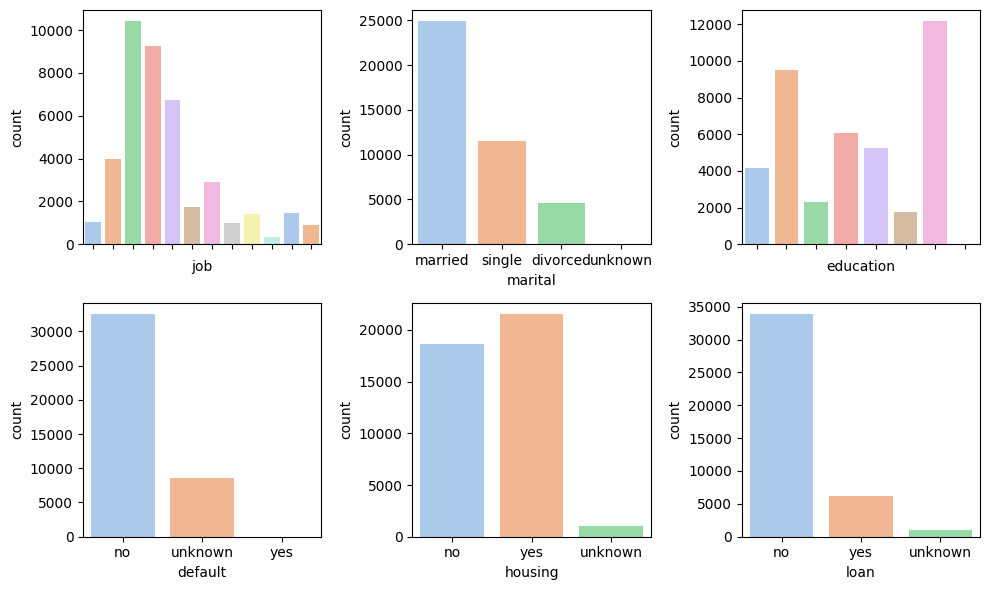

In [20]:
fig, axis = plt.subplots(2, 3, figsize=(10, 6))

sns.countplot(ax=axis[0, 0], data=df, x="job", palette='pastel', hue="job").set_xticklabels([])
sns.countplot(ax=axis[0, 1], data=df, x="marital", palette='pastel', hue="marital", legend=False)
sns.countplot(ax=axis[0, 2], data=df, x="education", palette='pastel', hue="education").set_xticklabels([])
sns.countplot(ax=axis[1, 0], data=df, x="default", palette='pastel', hue="default", legend=False)
sns.countplot(ax=axis[1, 1], data=df, x="housing", palette='pastel', hue="housing", legend=False)
sns.countplot(ax=axis[1, 2], data=df, x="loan", palette='pastel', hue="loan", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

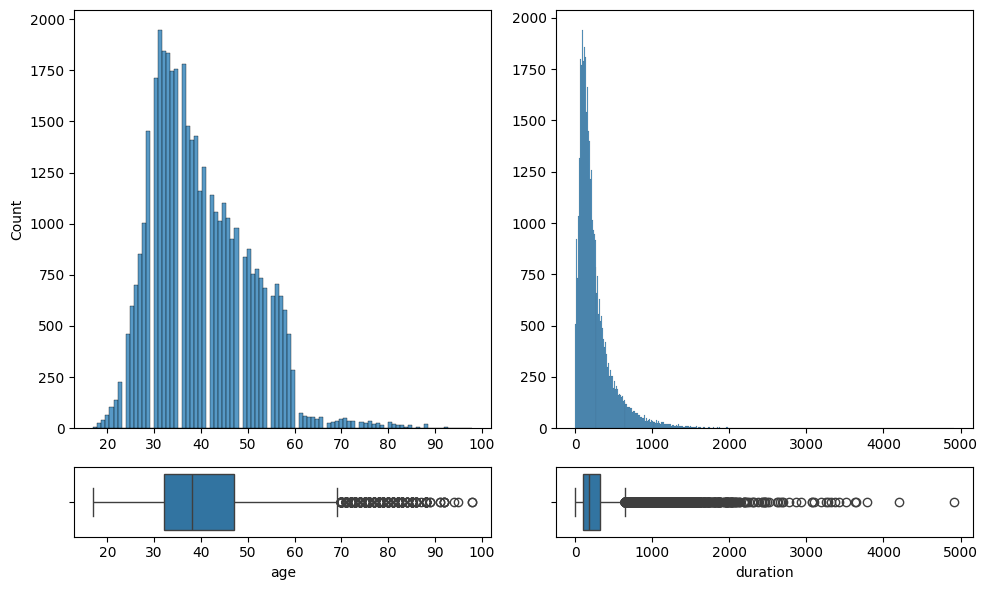

In [22]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax=axis[0, 0], data=df, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="age")
sns.histplot(ax=axis[0, 1], data=df, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="duration")
plt.tight_layout()
plt.show()

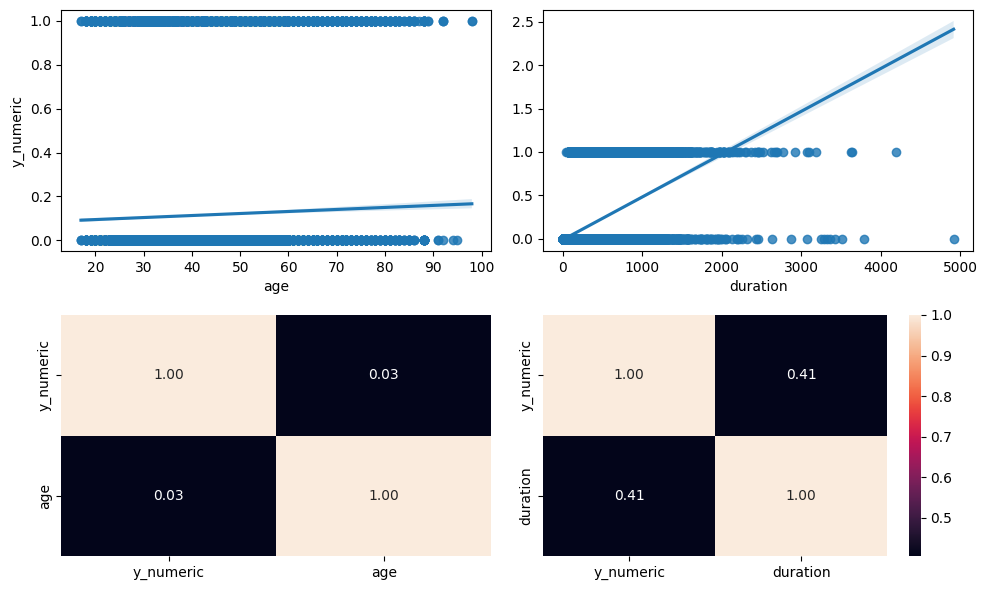

In [23]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.regplot(ax=axis[0, 0], data=df, x="age", y="y_numeric")
sns.heatmap(df[["y_numeric", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x="duration", y="y_numeric").set(ylabel=None)
sns.heatmap(df[["y_numeric", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
plt.tight_layout()
plt.show()

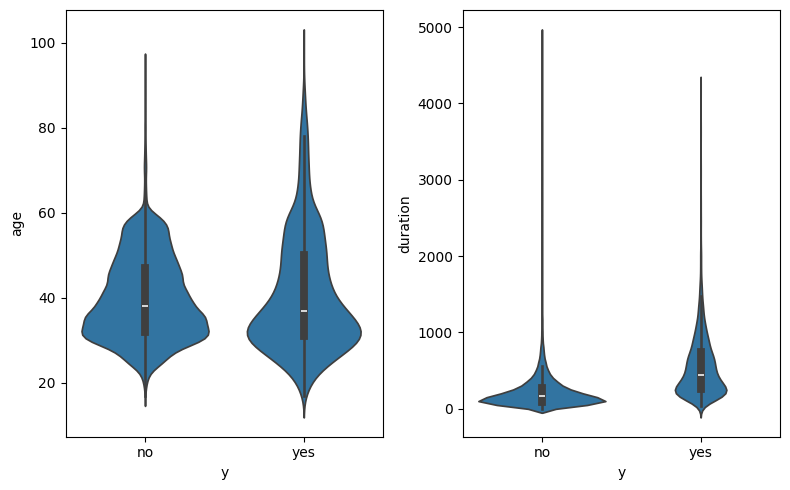

In [24]:
plt.show()

fig, axis = plt.subplots(1, 2, figsize=(8, 5))

sns.violinplot(ax=axis[0], x='y', y='age', data=df)
sns.violinplot(ax=axis[1], x='y', y='duration', data=df)

plt.tight_layout()

plt.show()

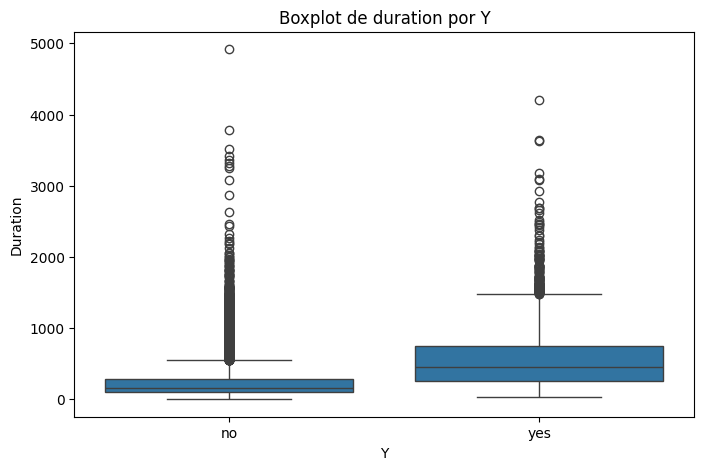

In [25]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='y', y='duration', data=df)

plt.title('Boxplot de duration por Y')
plt.xlabel('Y')
plt.ylabel('Duration')
plt.show()

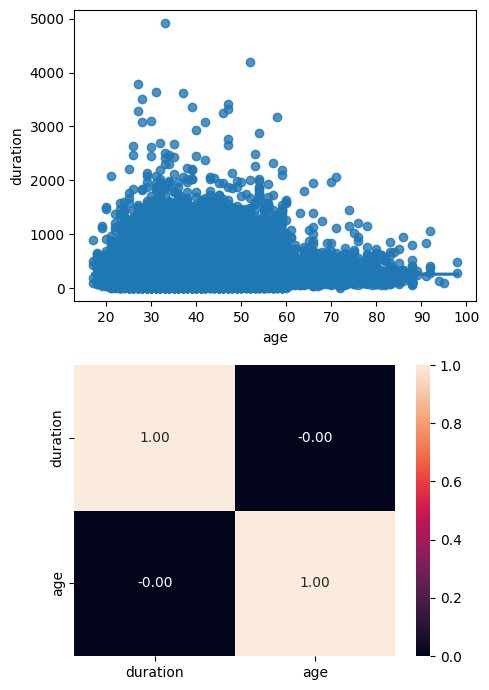

In [26]:
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df, x="age", y="duration")
sns.heatmap(df[["duration", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1])

plt.tight_layout()

plt.show()

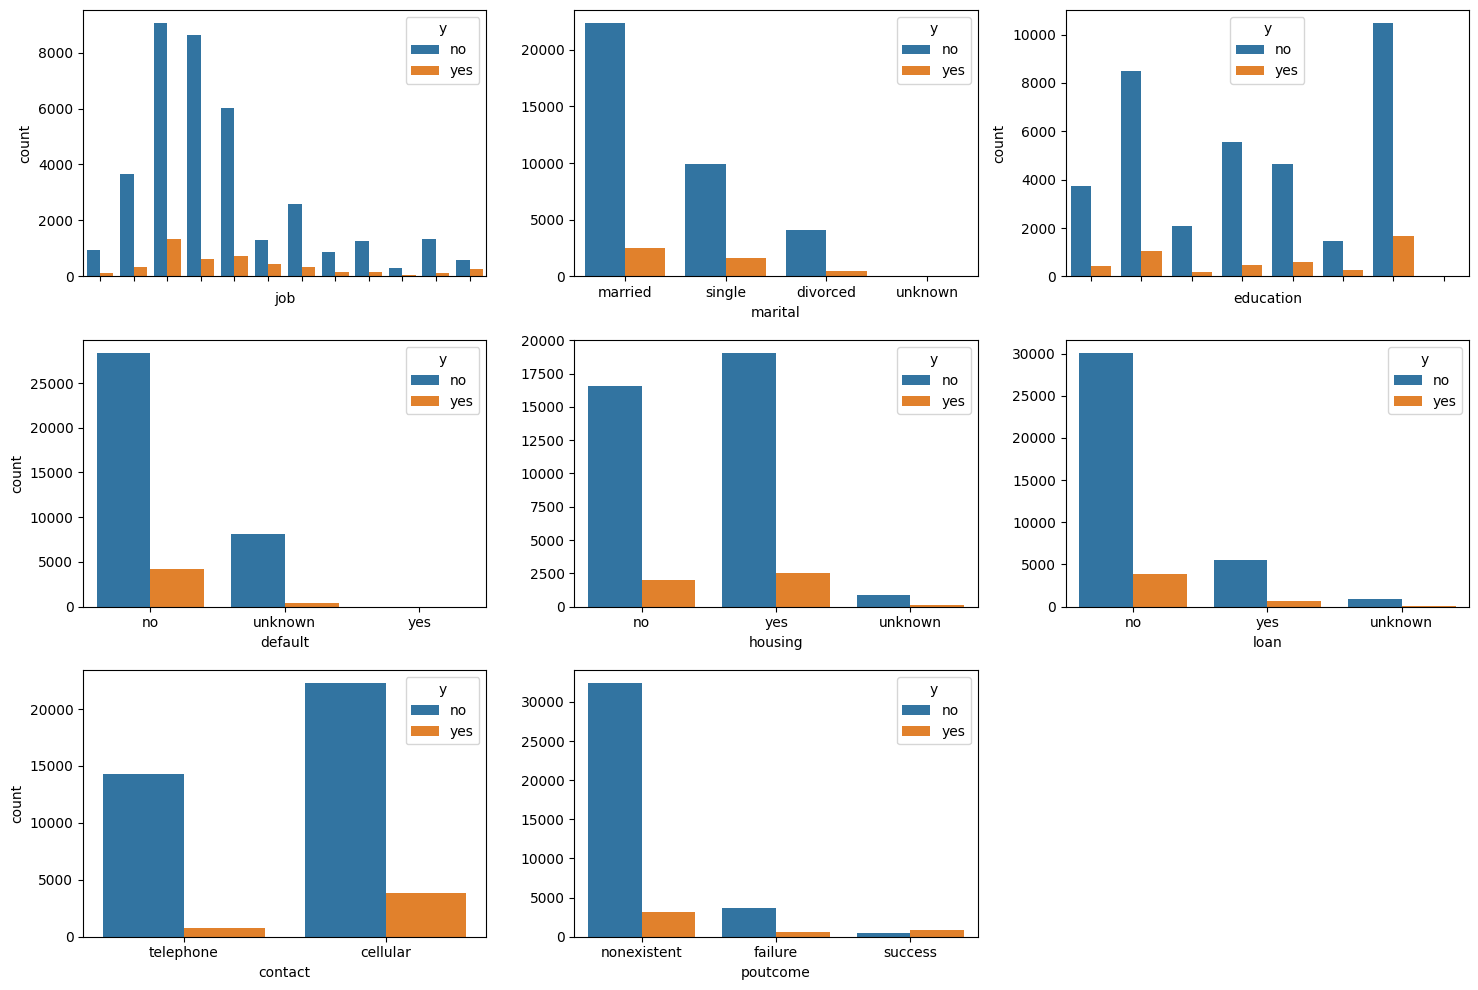

In [27]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(ax=axis[0, 0], data=df, x="job", hue="y").set_xticklabels([])
sns.countplot(ax=axis[0, 1], data=df, x="marital", hue="y").set(ylabel=None)
sns.countplot(ax=axis[0, 2], data=df, x="education", hue="y").set_xticklabels([])
sns.countplot(ax=axis[1, 0], data=df, x="default", hue="y")
sns.countplot(ax=axis[1, 1], data=df, x="housing", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 2], data=df, x="loan", hue="y").set(ylabel=None)
sns.countplot(ax=axis[2, 0], data=df, x="contact", hue="y")
sns.countplot(ax=axis[2, 1], data=df, x="poutcome", hue="y").set(ylabel=None)

plt.tight_layout()
fig.delaxes(axis[2, 2])

plt.show()

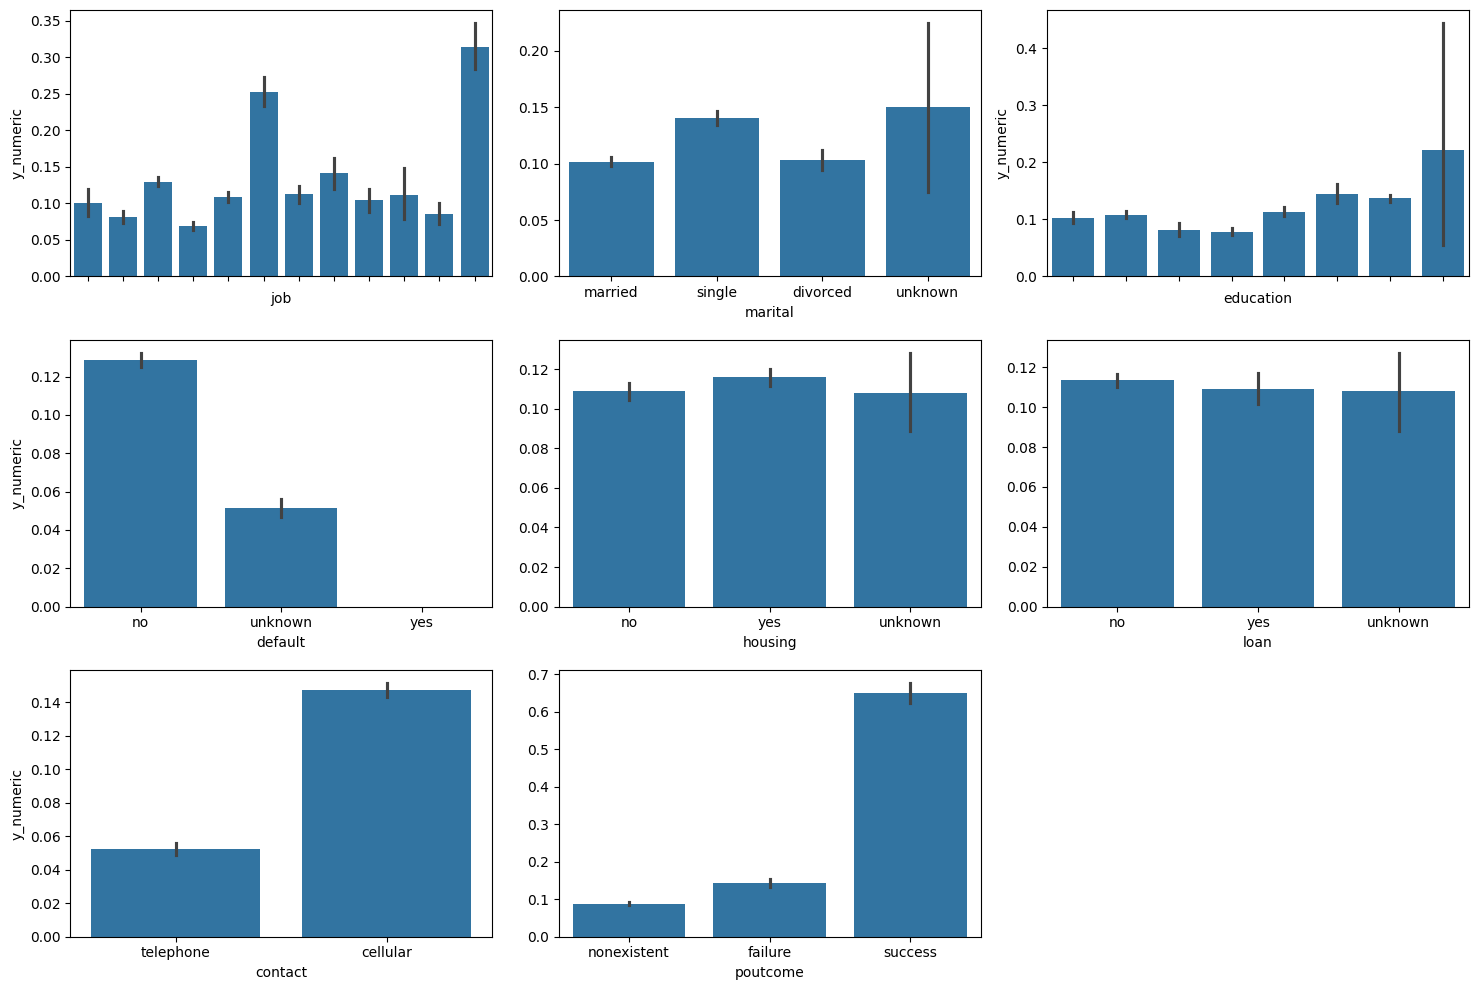

In [28]:

fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.barplot(ax=axis[0, 0], data=df, x="job", y="y_numeric").set_xticklabels([])
sns.barplot(ax=axis[0, 1], data=df, x="marital", y="y_numeric").set(ylabel=None)
sns.barplot(ax=axis[0, 2], data=df, x="education", y="y_numeric").set_xticklabels([])
sns.barplot(ax=axis[1, 0], data=df, x="default", y="y_numeric")
sns.barplot(ax=axis[1, 1], data=df, x="housing", y="y_numeric").set(ylabel=None)
sns.barplot(ax=axis[1, 2], data=df, x="loan", y="y_numeric").set(ylabel=None)
sns.barplot(ax=axis[2, 0], data=df, x="contact", y="y_numeric")
sns.barplot(ax=axis[2, 1], data=df, x="poutcome", y="y_numeric").set(ylabel=None)

plt.tight_layout()
fig.delaxes(axis[2, 2])

plt.show()

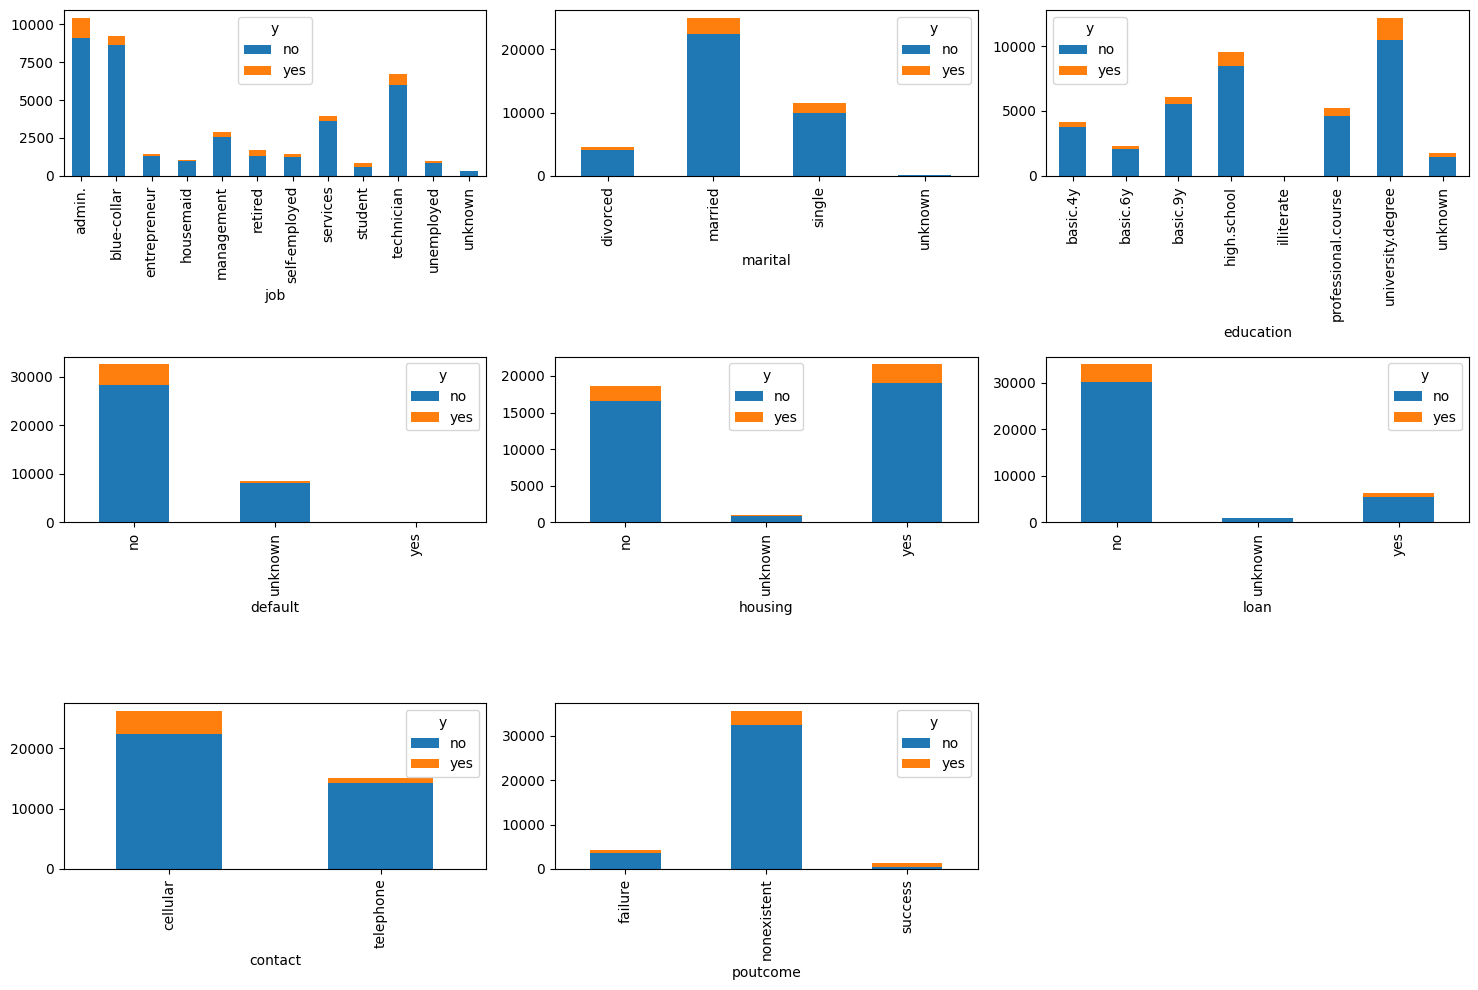

In [29]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

crosstab_job = pd.crosstab(df['job'], df['y'])
crosstab_job.div(crosstab_job.sum(1).astype(float), axis=0)
crosstab_job.plot(kind='bar', stacked=True, ax=axis[0, 0])

crosstab_marital = pd.crosstab(df['marital'], df['y'])
crosstab_marital.div(crosstab_marital.sum(1).astype(float), axis=0)
crosstab_marital.plot(kind='bar', stacked=True, ax=axis[0, 1])

crosstab_education = pd.crosstab(df['education'], df['y'])
crosstab_education.div(crosstab_education.sum(1).astype(float), axis=0)
crosstab_education.plot(kind='bar', stacked=True, ax=axis[0, 2])

crosstab_default = pd.crosstab(df['default'], df['y'])
crosstab_default.div(crosstab_default.sum(1).astype(float), axis=0)
crosstab_default.plot(kind='bar', stacked=True, ax=axis[1, 0])

crosstab_housing = pd.crosstab(df['housing'], df['y'])
crosstab_housing.div(crosstab_housing.sum(1).astype(float), axis=0)
crosstab_housing.plot(kind='bar', stacked=True, ax=axis[1, 1])

crosstab_loan = pd.crosstab(df['loan'], df['y'])
crosstab_loan.div(crosstab_loan.sum(1).astype(float), axis=0)
crosstab_loan.plot(kind='bar', stacked=True, ax=axis[1, 2])

crosstab_contact = pd.crosstab(df['contact'], df['y'])
crosstab_contact.div(crosstab_contact.sum(1).astype(float), axis=0)
crosstab_contact.plot(kind='bar', stacked=True, ax=axis[2, 0])

crosstab_poutcome = pd.crosstab(df['poutcome'], df['y'])
crosstab_poutcome.div(crosstab_poutcome.sum(1).astype(float), axis=0)
crosstab_poutcome.plot(kind='bar', stacked=True, ax=axis[2, 1])

plt.tight_layout()
fig.delaxes(axis[2, 2])

plt.show()

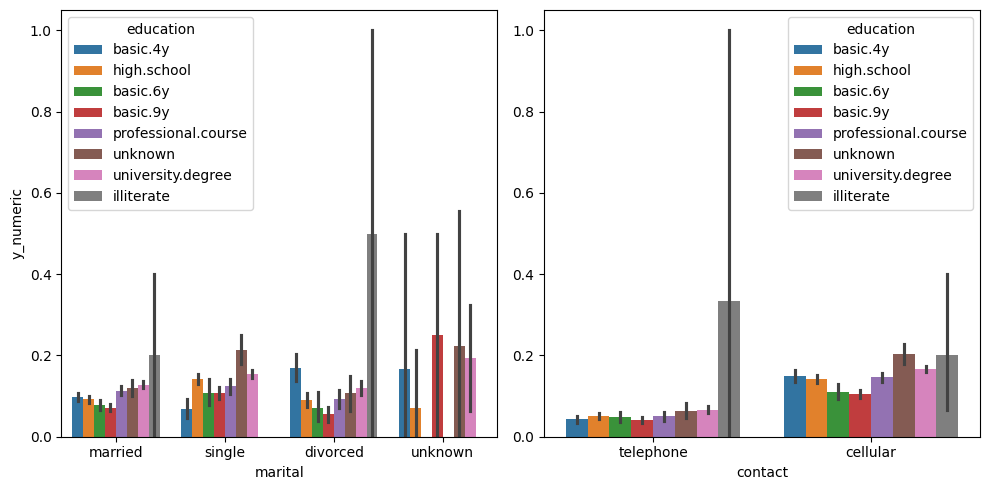

In [30]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.barplot(ax=axis[0], data=df, x="marital", y="y_numeric", hue="education")
sns.barplot(ax=axis[1], data=df, x="contact", y="y_numeric", hue="education").set(ylabel=None)

plt.tight_layout()

plt.show()

In [31]:
df["marital_n"] = pd.factorize(df["marital"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,marital_n,contact_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0


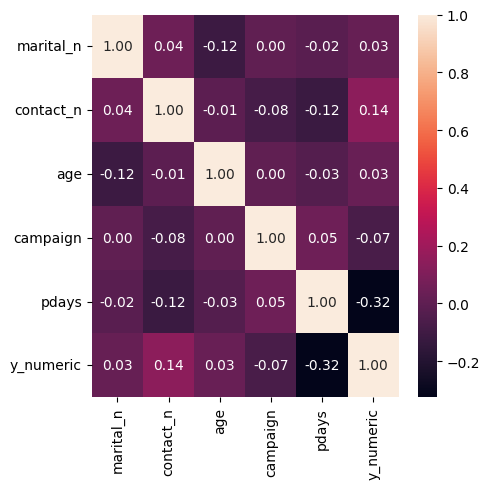

In [33]:
fig, axis = plt.subplots(figsize=(5, 5))

sns.heatmap(df[["marital_n", "contact_n", "age", "campaign", "pdays", "y_numeric"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()

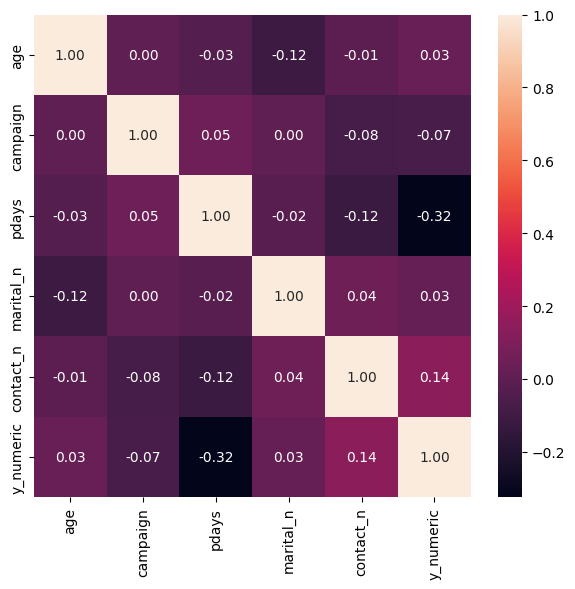

In [34]:
fig, axis = plt.subplots(figsize = (6, 6))

sns.heatmap(df[[ "age", "campaign", "pdays","marital_n", "contact_n", "y_numeric"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

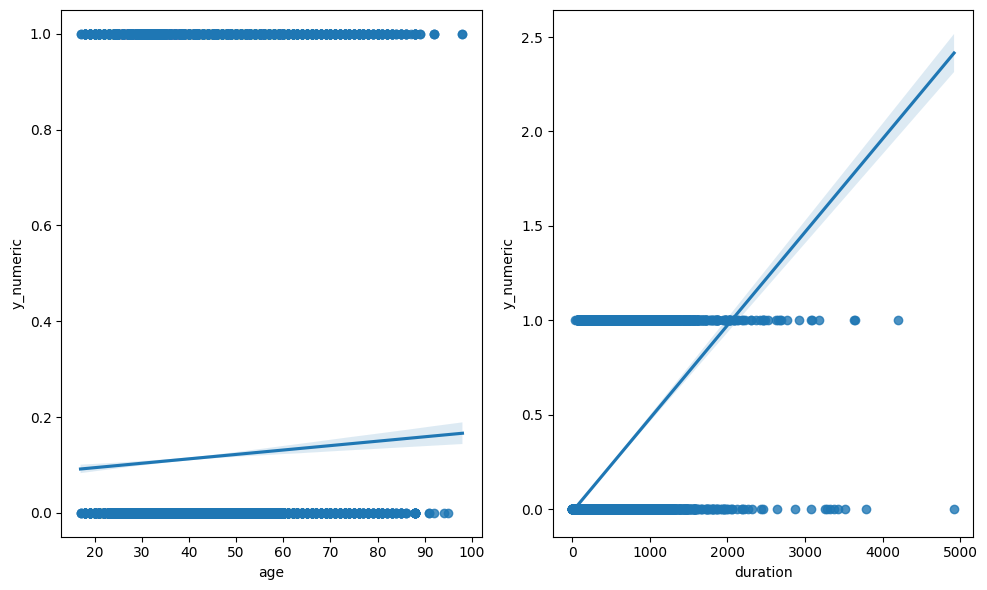

In [35]:

fig, axis = plt.subplots(figsize=(10, 6), ncols=2)

sns.regplot(ax=axis[0], data=df, x="age", y="y_numeric")
sns.regplot(ax=axis[1], data=df, x="duration", y="y_numeric")

plt.tight_layout()

plt.show()

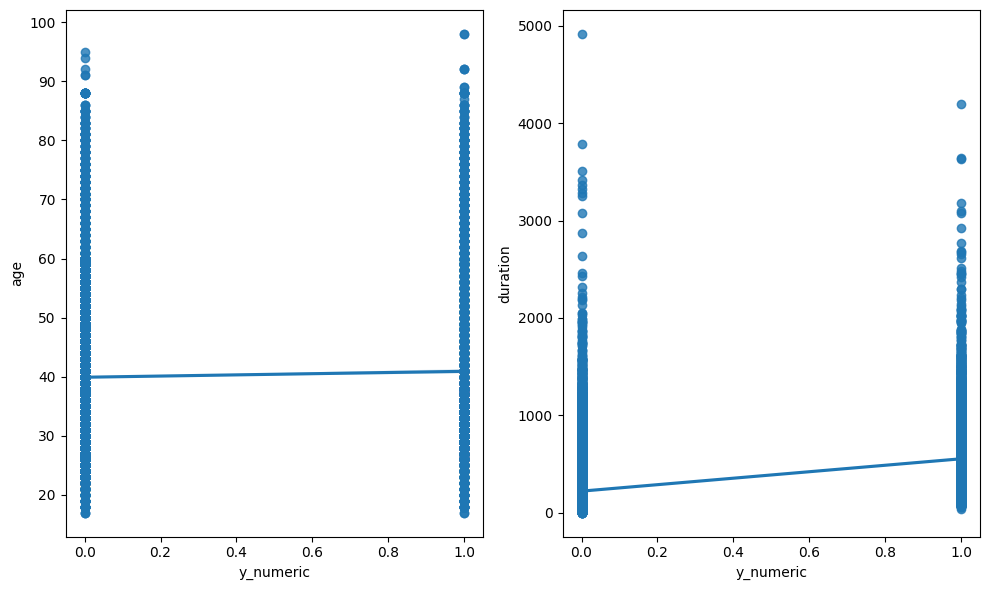

In [36]:

fig, axis = plt.subplots(figsize=(10, 6), ncols=2)

sns.regplot(ax=axis[0], data=df, x="y_numeric", y="age")
sns.regplot(ax=axis[1], data=df, x="y_numeric", y="duration")

plt.tight_layout()

plt.show()

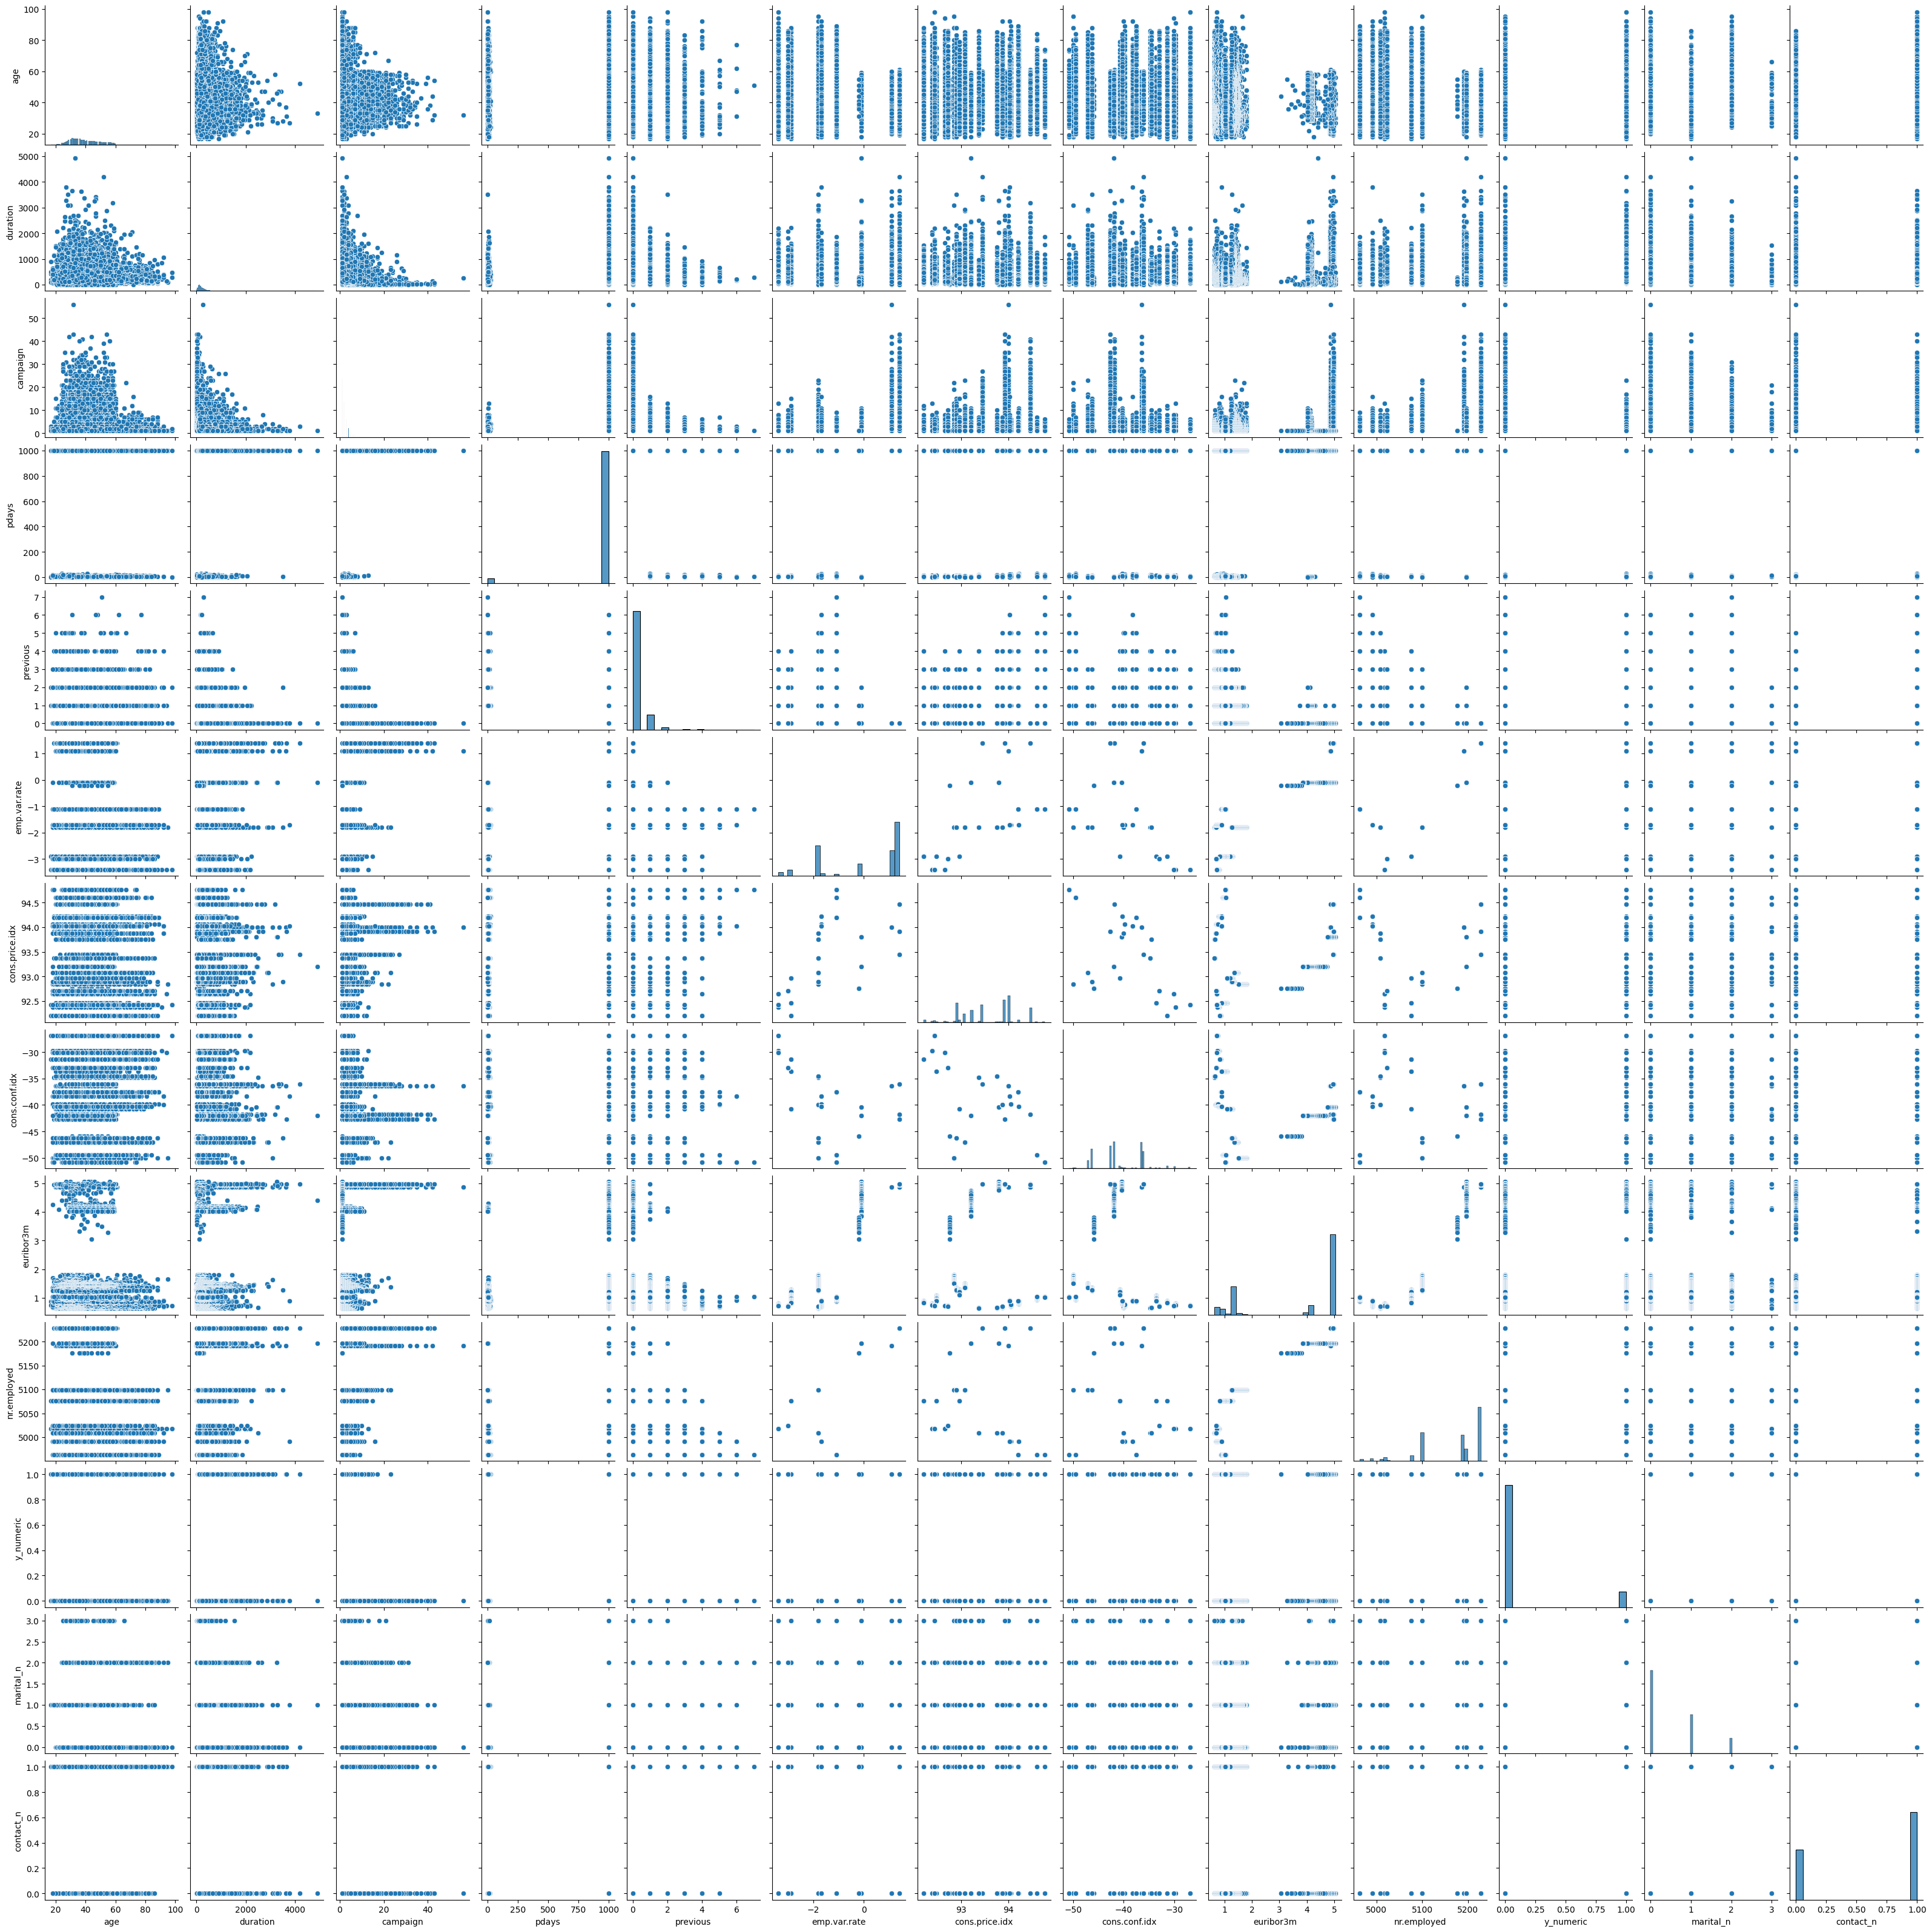

In [37]:
sns.pairplot(data = df)

In [38]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_numeric,marital_n,contact_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663,0.510637,0.634714
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184,0.696794,0.481516
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,1.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000,1.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,3.000000,1.000000


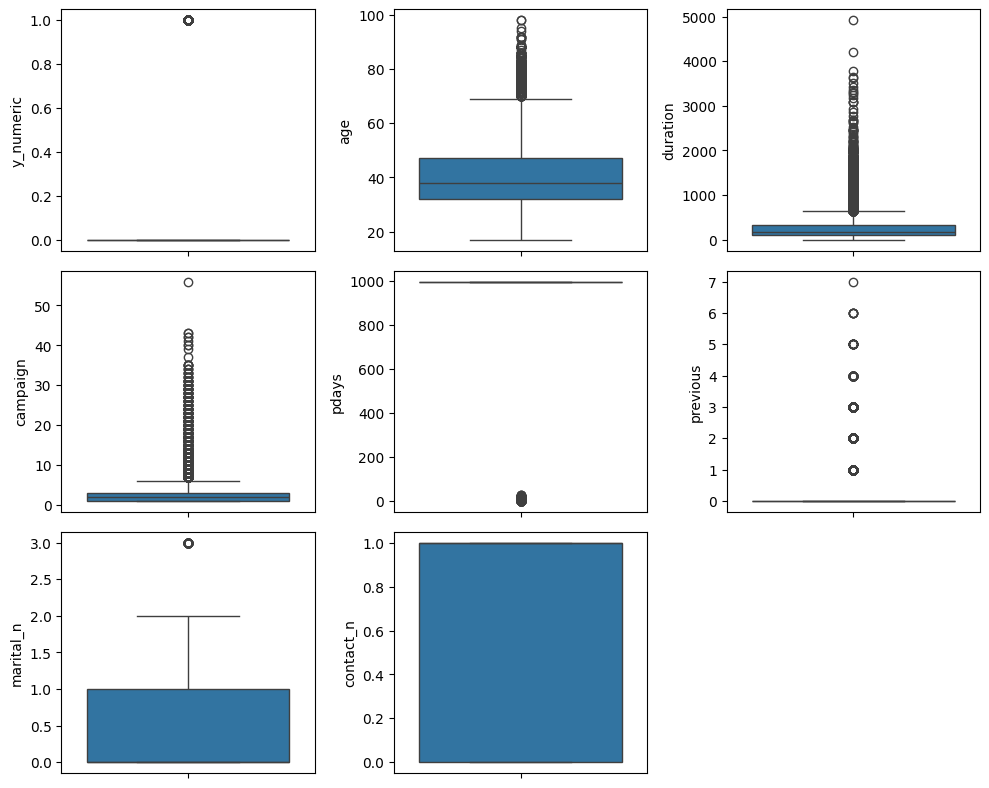

In [39]:
fig, axis = plt.subplots(3, 3, figsize=(10, 8))

sns.boxplot(ax=axis[0, 0], data=df, y="y_numeric")
sns.boxplot(ax=axis[0, 1], data=df, y="age")
sns.boxplot(ax=axis[0, 2], data=df, y="duration")
sns.boxplot(ax=axis[1, 0], data=df, y="campaign")
sns.boxplot(ax=axis[1, 1], data=df, y="pdays")
sns.boxplot(ax=axis[1, 2], data=df, y="previous")
sns.boxplot(ax=axis[2, 0], data=df, y="marital_n")
sns.boxplot(ax=axis[2, 1], data=df, y="contact_n")

fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()

In [40]:
age_est = df["age"].describe()
print(age_est)

age_iqr = age_est["75%"] - age_est["25%"]
upper_limit = age_est["75%"] + 1.5 * age_iqr
lower_limit = age_est["25%"] - 1.5 * age_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

#Eliminamos valores mayores de 75 ya que la mayoria ya la contemplamos en 69.5
df = df[df["age"] <= 75]

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [41]:
edad = df[df["age"] == 70].shape[0]
edad2 = df[df["age"] == 76].shape[0]
print("Edad de 70 valores: ", edad)
print("Edad de 76, no deberian haber ya que los hemos borrado: ", edad2)

Edad de 70 valores:  47
Edad de 76, no deberian haber ya que los hemos borrado:  0


In [42]:
dur_est = df["duration"].describe()
print(dur_est)

dur_iqr = dur_est["75%"] - dur_est["25%"]
upper_limit = dur_est["75%"] + 1.5 * dur_iqr
lower_limit = dur_est["25%"] - 1.5 * dur_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(dur_iqr, 2)}")

#Borramos los valores menores a 0 ya que son valores erroneos
df = df[df["duration"] > 0]

count    40931.000000
mean       258.193521
std        259.599460
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 644.5 y -223.5, con un rango intercuartílico de 217.0


In [43]:
camp_est = df["campaign"].describe()
print(camp_est)

camp_iqr = camp_est["75%"] - camp_est["25%"]
upper_limit = camp_est["75%"] + 1.5 * camp_iqr
lower_limit = camp_est["25%"] - 1.5 * camp_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(camp_iqr, 2)}")

# Filtramos valores extremos
df = df[df["campaign"] <= upper_limit + 3]
df = df[df["campaign"] > 0]

count    40927.000000
mean         2.571945
std          2.775749
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 6.0 y -2.0, con un rango intercuartílico de 2.0


In [44]:
pdays_est = df["pdays"].describe()
print(pdays_est)

pdays_iqr = pdays_est["75%"] - pdays_est["25%"]
upper_limit = pdays_est["75%"] + 1.5 * pdays_iqr
lower_limit = pdays_est["25%"] - 1.5 * pdays_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(pdays_iqr, 2)}")

df = df[df["pdays"] <= upper_limit]

count    39834.000000
mean       962.830421
std        186.032168
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 999.0 y 999.0, con un rango intercuartílico de 0.0


In [45]:
prev_est = df["previous"].describe()
print(prev_est)

prev_iqr = prev_est["75%"] - prev_est["25%"]
upper_limit = prev_est["75%"] + 1.5 * prev_iqr
lower_limit = prev_est["25%"] - 1.5 * prev_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(prev_iqr, 2)}")

# Eliminamos valores extremos
df = df[df["previous"] <= upper_limit]

count    39834.000000
mean         0.173545
std          0.492488
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64
Los límites superior e inferior para la búsqueda de outliers son 0.0 y 0.0, con un rango intercuartílico de 0.0


In [46]:
df = df

In [47]:
df.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_numeric         0
marital_n         0
contact_n         0
dtype: int64

In [48]:
# en porcentaje
df.isnull().sum().sort_values(ascending=False) / len(df)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
y_numeric         0.0
marital_n         0.0
contact_n         0.0
dtype: float64

In [49]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_numeric         0
marital_n         0
contact_n         0
dtype: int64

In [50]:
#
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["day_of_week_n"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]
#Hemos hecho que los valores sean númericos antes no lo eran para tratarlos mejor

In [51]:
#Variables numericas después de haber hecho las nuevas
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]


In [52]:
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
datosTotales = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
datosTotales.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052878,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030100,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045760,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030506,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062233,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [53]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = datosTotales.drop("y_n", axis = 1)
y = datosTotales["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
seleccionTrain = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
seleccionTest = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])



In [54]:
seleccionTrain.head()

,contact_n,month_n,duration,emp.var.rate,euribor3m
0,0.0,0.000000,0.010982,0.937500,0.957379
1,1.0,0.888889,0.008338,0.333333,0.174790
2,1.0,0.222222,0.015863,1.000000,0.981183
3,0.0,0.111111,0.013830,1.000000,0.958966
4,0.0,0.111111,0.013626,1.000000,0.980730


In [55]:
seleccionTest.head()

,contact_n,month_n,duration,emp.var.rate,euribor3m
0,1.0,0.555556,0.033964,0.687500,0.780322
1,1.0,0.333333,0.016677,1.000000,0.982090
2,0.0,0.111111,0.027863,1.000000,0.980277
3,1.0,0.888889,0.051251,0.333333,0.195874
4,1.0,0.222222,0.173480,1.000000,0.980730


In [56]:
seleccionTrain["y_n"] = list(y_train)
seleccionTest["y_n"] = list(y_test)
seleccionTrain.to_csv("../data/processed/clean_train.csv", index = False)
seleccionTest.to_csv("../data/processed/clean_test.csv", index = False)

#Guardamos los valores que después leeremos en la regresión

REGRESIÓN LOGISTICA

In [57]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,contact_n,month_n,duration,emp.var.rate,euribor3m,y_n
0,0.0,0.000000,0.010982,0.937500,0.957379,0.0
1,1.0,0.888889,0.008338,0.333333,0.174790,0.0
2,1.0,0.222222,0.015863,1.000000,0.981183,0.0
3,0.0,0.111111,0.013830,1.000000,0.958966,0.0
4,0.0,0.111111,0.013626,1.000000,0.980730,0.0


In [58]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(3434,))

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9219569015725102

In [62]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [63]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparamaetros: {grid.best_params_}")

Mejores hiperparamaetros: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [64]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [65]:
model_grid = LogisticRegression(penalty = "l1", C = 1, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9210832847990681

In [66]:
# Ajustamos los parametros
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# La búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=0.1, solver='liblinear'),
                   n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [67]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'sag', 'penalty': None, 'C': np.float64(29.763514416313132)}


In [68]:
model_random_search = LogisticRegression(penalty = "l2", C = 29.7635, solver = "lbfgs")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9207920792079208